In [2]:
import numpy as np
import torch

import matplotlib.pyplot as plt
import pandas as pd

from train import TrainerDALMM
# from test import eval
from preprocess import get_KDDCup99

In [ ]:
if __name__ == "__main__":
    class Args:
        num_epochs = 20
        patience = 50
        lr = 1e-4
        lr_milestones = [50]
        batch_size = 1024
        latent_dim = 10
        n_lmm = 4
        lambda_energy = 0.1
        lambda_cov = 0.005  
    
    
    args = Args()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    data = get_KDDCup99(args)
    trainer = TrainerDALMM(args, data, device)
    model = trainer.train()


Epoch 1/20 - Loss: 2.467015
Epoch 2/20 - Loss: 2.465472
Epoch 3/20 - Loss: 2.467882
Epoch 4/20 - Loss: 2.463708
Epoch 5/20 - Loss: 2.464949
Epoch 6/20 - Loss: 2.466628
Epoch 7/20 - Loss: 2.464305
Epoch 8/20 - Loss: 2.467412
Epoch 9/20 - Loss: 2.465845
Epoch 10/20 - Loss: 2.464733
Epoch 11/20 - Loss: 2.464362
Epoch 12/20 - Loss: 2.466083
Epoch 13/20 - Loss: 2.465034
Epoch 14/20 - Loss: 2.464302
Epoch 15/20 - Loss: 2.467517
Epoch 16/20 - Loss: 2.463827
Epoch 17/20 - Loss: 2.467577
Epoch 18/20 - Loss: 2.464567
Epoch 19/20 - Loss: 2.462199
Epoch 20/20 - Loss: 2.463765
Training complete. Best epoch: 19, Best loss: 2.462199


In [4]:
import torch
import numpy as np

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as prf, accuracy_score
from forward_step import ComputeLoss
from test import eval

sub = [10,20,30, 40, 50, 60]
for s in sub:
    print(s)
    labels, scores = eval(trainer.model, data, device, args.n_lmm, sub=s)
    

10
Contamination: 10% | Precision: 0.9434, Recall: 0.4530, F1: 0.6121, Acc: 0.8111, ROC AUC: 88.73
20
Contamination: 20% | Precision: 0.8143, Recall: 0.6967, F1: 0.7510, Acc: 0.8479, ROC AUC: 88.73
30
Contamination: 30% | Precision: 0.6427, Recall: 0.7203, F1: 0.6793, Acc: 0.7762, ROC AUC: 88.73
40
Contamination: 40% | Precision: 0.6312, Recall: 0.9364, F1: 0.7541, Acc: 0.7990, ROC AUC: 88.73
50
Contamination: 50% | Precision: 0.5698, Recall: 0.9506, F1: 0.7125, Acc: 0.7476, ROC AUC: 88.73
60
Contamination: 60% | Precision: 0.4811, Recall: 0.9506, F1: 0.6389, Acc: 0.6465, ROC AUC: 88.73


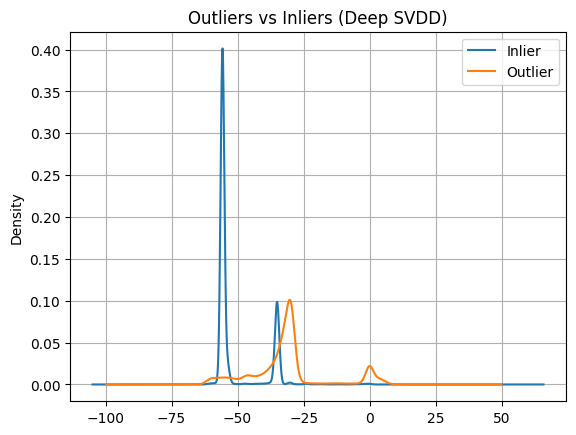

In [5]:
scores_in = scores[np.where(labels==0)[0]]
scores_out = scores[np.where(labels==1)[0]]


in_ = pd.DataFrame(scores_in, columns=['Inlier'])
out_ = pd.DataFrame(scores_out, columns=['Outlier'])


fig, ax = plt.subplots()
in_.plot.kde(ax=ax, legend=True, title='Outliers vs Inliers (Deep SVDD)')
out_.plot.kde(ax=ax, legend=True)
ax.grid(axis='x')
ax.grid(axis='y')
plt.show()